<a href="https://colab.research.google.com/github/AlanMarquesRocha/td04_pdi_final_project/blob/master/td04_pdi_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Programa de Pós-Graduação em Engenharia Elétrica e de Computação (PPGEEC)**
### **Processamento Digital de Imagens (PDI)**
### **Trabalho Final - Extração de características em imagens de células FVs monocristalinas**
### **Discente: Alan Marques da Rocha (543897)**


## **1ª Etapa: Importação das bibliotecas necessárias para o projeto**

In [54]:
# Importação das bibliotecas de manipulação de imagens
import cv2
from skimage.color import rgb2gray
from PIL import Image

# importação da lib do método LBP
from skimage.feature import local_binary_pattern

# Importação das libs para manipuçação de array e plotagem de imagens e gráficos
import numpy as np
from matplotlib import pyplot as plt

# Importação de libs para acesso a repositórios
import glob
from skimage import io

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **2ª Etapa: Copiando as imagens para um diretório de acesso do colab**

In [55]:
# Realiza a cópia de uma pasta específica do drive no ambiente colab:
# O comando abaixo realiza uma cópia das imagens que serão utilizadas no projeto.

# diretorio para as imagens originais
# !cp -R /content/gdrive/MyDrive/_ppgeec_mestrado/2022_2/_disciplinas_semestrais/processamento_digital_de_imagens/t04_trabalho_final/mono imagens/

# diretório para as imagens que serão convertidas em níveis de cinza
!cp -R /content/gdrive/MyDrive/_ppgeec_mestrado/2022_2/_disciplinas_semestrais/processamento_digital_de_imagens/t04_trabalho_final/mono imagens_gray/

## **3ª Etapa: Carregando as imagens do dataset**

### **3.1 Carregando as imagens e convertendo em níveis de cinza**

In [58]:
# Pega a lista de todas as imagens no diretório [imagens]
paths = glob.glob("/content/imagens_gray/mono/*")


imgs_gray = [] # cria uma lista vazia para armazenar as imagens em níveis de cinza.

# importa as imagens, converte para níveis de cinza e armaneza na lista.
for path in paths:
    imgs_gray.append(rgb2gray(io.imread(path)))

<ipython-input-58-cdc0e2ebd702>:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  imgs_gray.append(rgb2gray(io.imread(path)))


In [68]:
imgs_gray

### **3.2 Apresentando exemplos de imagens em níveis de cinza**

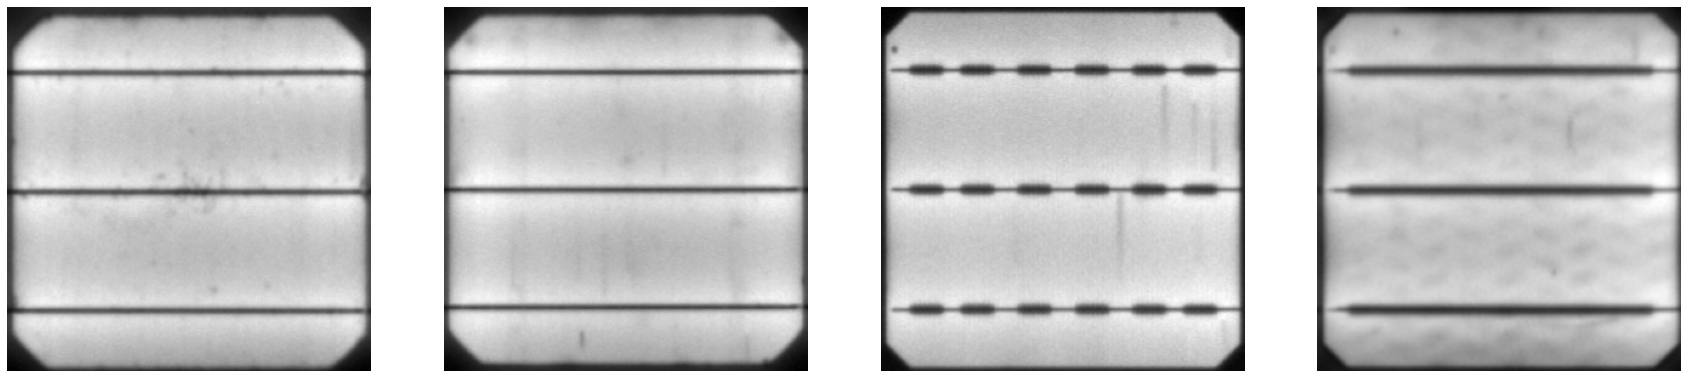

In [60]:
W_grid = 4 #colunas
L_grid = 1 #linhas
fig, axes = plt.subplots(L_grid, W_grid, figsize = (30,30))
axes = axes.ravel()
n_training = len(imgs_gray)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(imgs_gray[i], cmap = 'gray')
  #axes[i].set_title('Imagem em grayscale {}'.format(i), fontsize = 5)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.1)

## **4ª Etapa: Pré-Processamento das Imagens**

Nesta etapa serão implementadas técnicas de pré-processamento baseadas em ``morfologia matemática`` e aplicação de filtros para redução de ruídos.

In [61]:
# Cria uma lista para guardar as imagens filtradas
imgs_filter = []

for img in imgs_gray:
  # aplicando o filtro bilateral com uma distancia d = 30
  imgs_filter.append(cv2.bilateralFilter(img, 30, 15, 15))

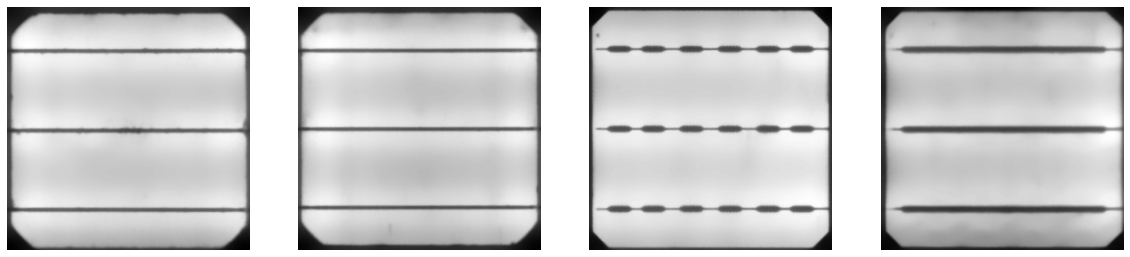

In [69]:
# Exemplo de aplicaçao

W_grid = 4 #colunas
L_grid = 1 #linhas
fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))
axes = axes.ravel()
n_training = len(imgs_filter)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(imgs_filter[i], cmap = 'gray')
  #axes[i].set_title('Imagem LBP {}'.format(i), fontsize = 12)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.1)

## **5ª Etapa: Implementação do método ``Local Binary Pattern (LBP)``**

In [63]:
# tipo de LBP
METHOD = 'uniform'  # at most two circular 0-1 or 1-0 transitions
radius = 1  # distância entre o pixel central e a comparação dos pixels
n_points = 8 * radius  # define o número de comparações dos pixels

# create list for LBP representations
lbp_imgs = []

# create LBP for each image and add to list
for img in imgs_filter:
  lbp_imgs.append(local_binary_pattern(img, n_points, radius, METHOD))

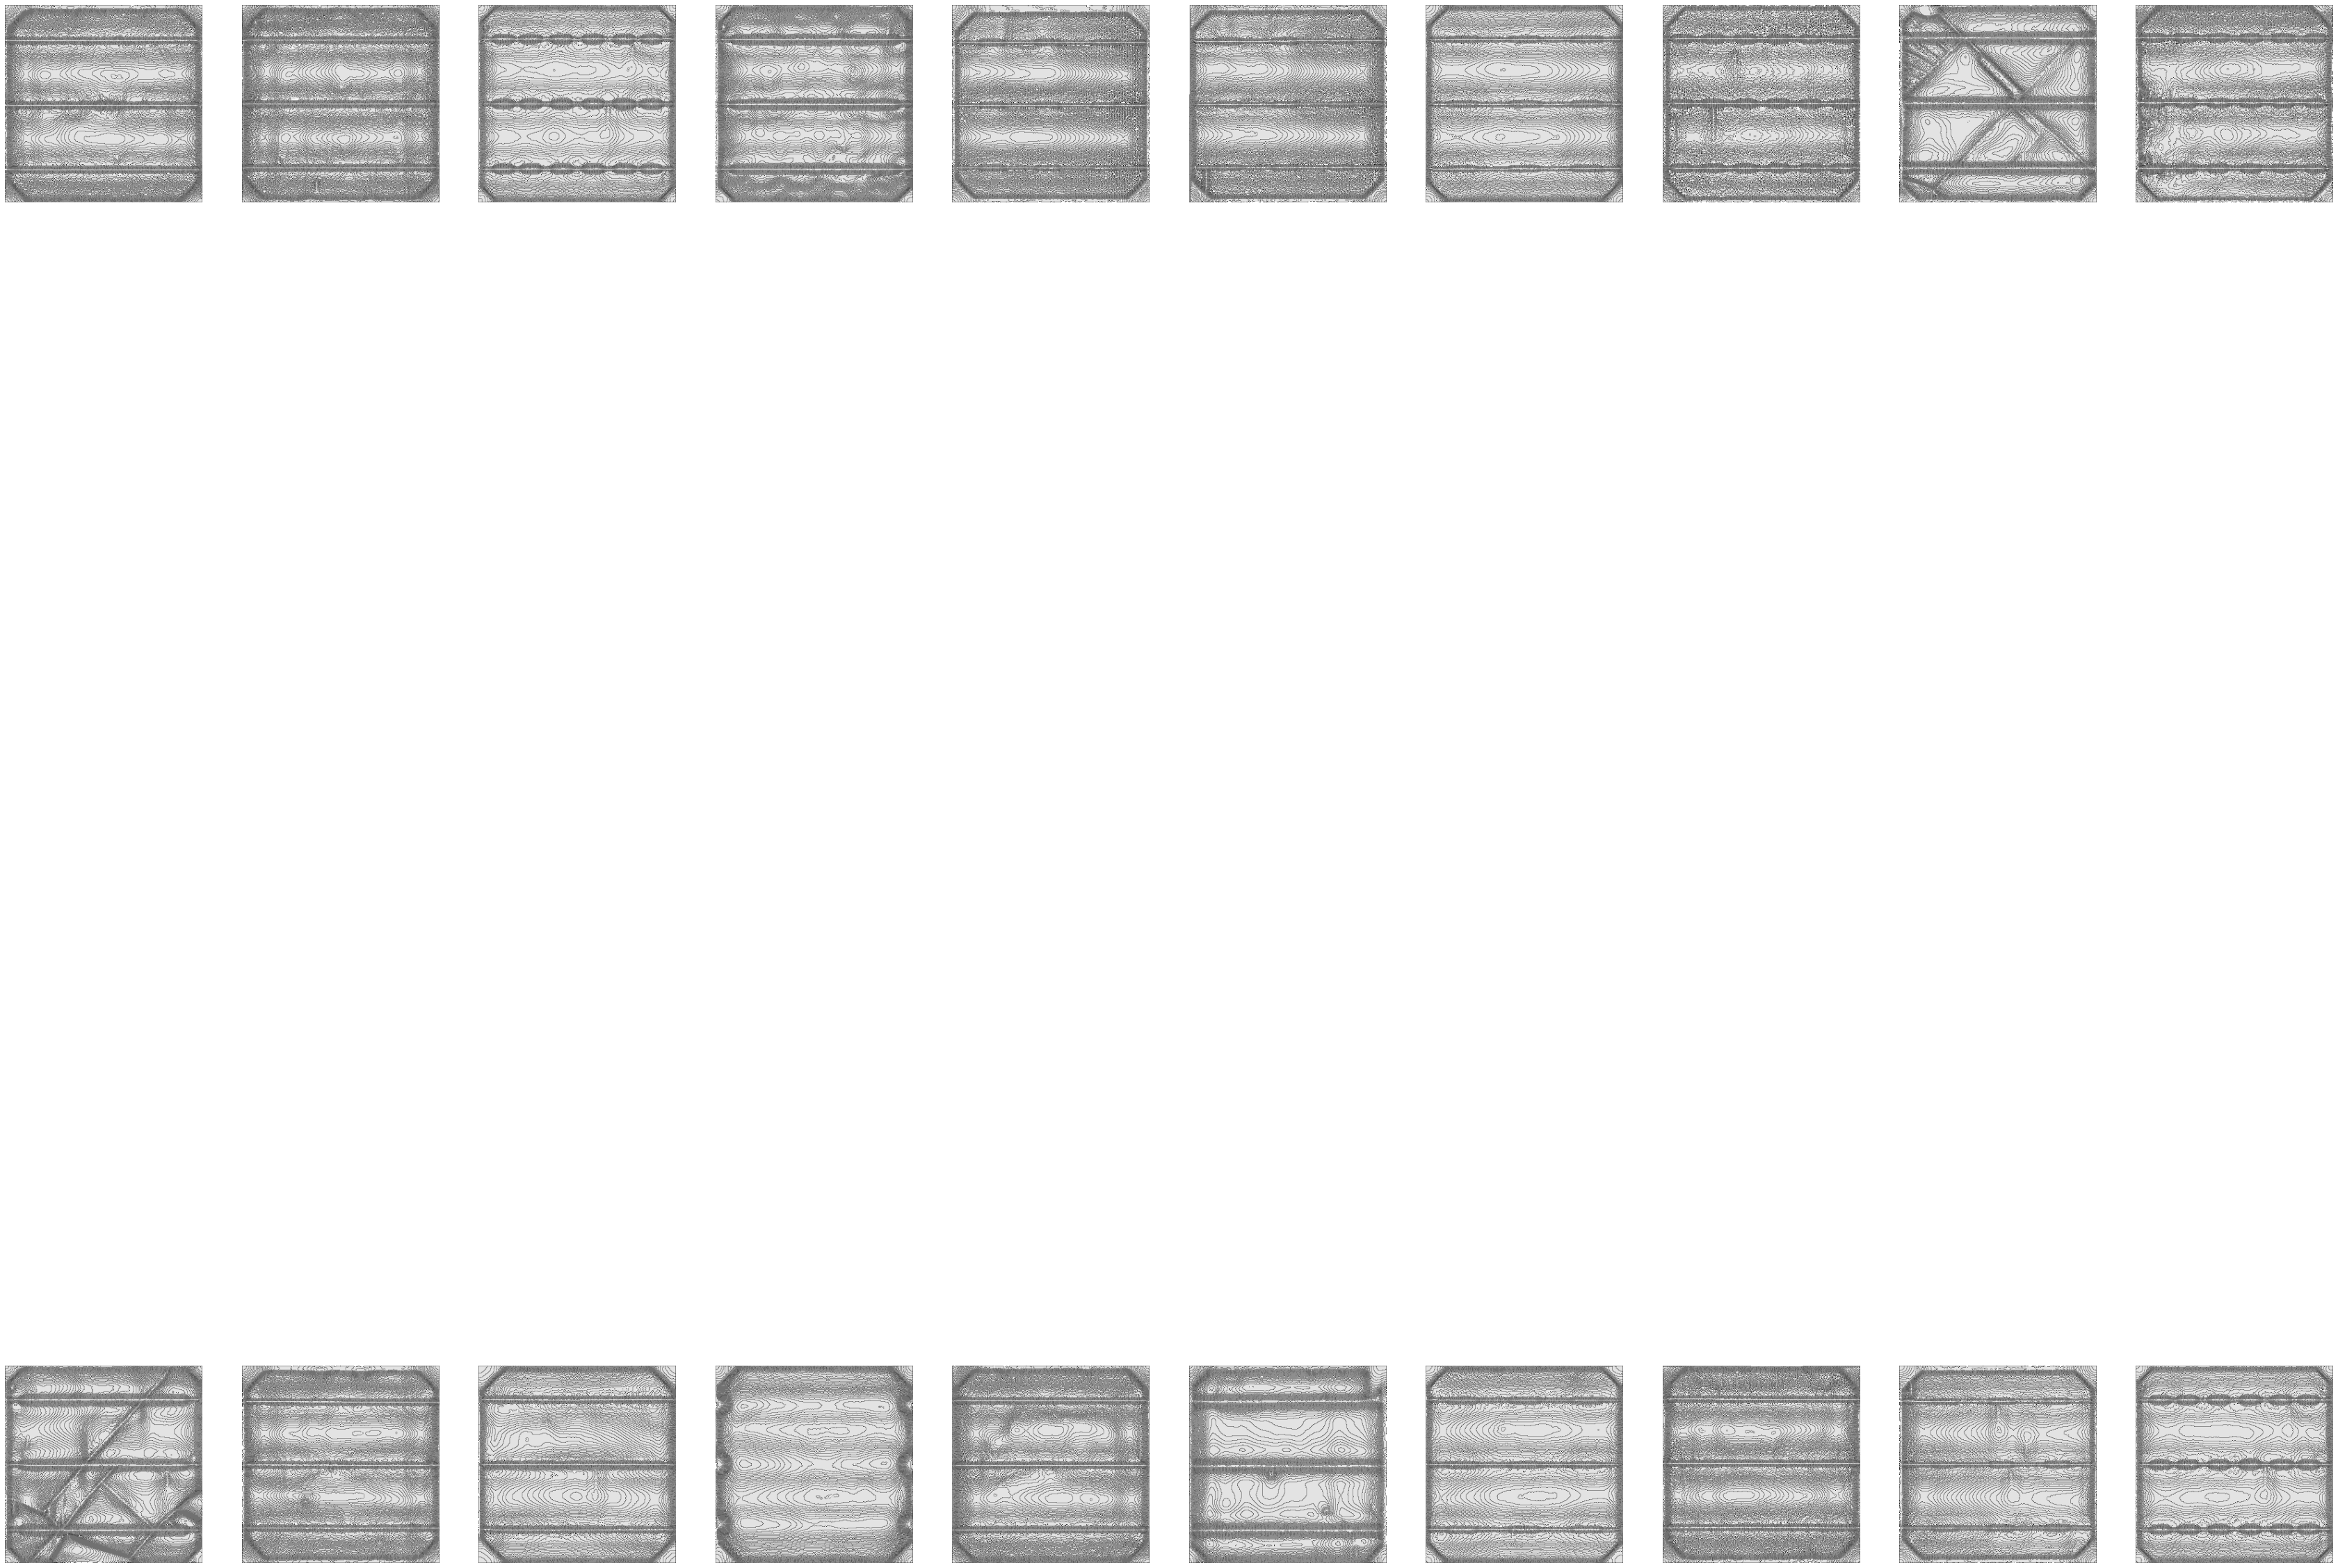

In [151]:
# Exemplo de aplicaçao do método LBP para duas imagens:

W_grid = 10
L_grid = 2
fig, axes = plt.subplots(L_grid, W_grid, figsize = (60,60))
axes = axes.ravel()
n_training = len(lbp_imgs)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(lbp_imgs[i], cmap = 'gray')
  #axes[i].set_title('Imagem LBP {}'.format(i), fontsize = 12)
  axes[i].axis('off')
  
plt.subplots_adjust(hspace=0.5)


# Link para referências: https://towardsdatascience.com/the-power-of-local-binary-patterns-3134178af1c7
# https://github.com/bnsreenu/python_for_microscopists/blob/master/200_image_classification_using_GLCM.py
# https://www.youtube.com/watch?v=5x-CIHRmMNY&t=16s

## **6ª Etapa: Apresentação dos resultados obtidos**

In [115]:
img1 = cv2.imread('/content/imagens_gray/mono/cell1468.png')
img2 = cv2.imread('/content/imagens_gray/mono/cell0019.png')
img3 = cv2.imread('/content/imagens_gray/mono/cell0046.png')
img4 = cv2.imread('/content/imagens_gray/mono/cell0456.png')
img5 = cv2.imread('/content/imagens_gray/mono/cell0005.png')

In [118]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
img4_gray = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)
img5_gray = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)

In [119]:
img1_filter = cv2.bilateralFilter(img1_gray, 15, 15, 15)
img2_filter = cv2.bilateralFilter(img2_gray, 15, 15, 15)
img3_filter = cv2.bilateralFilter(img3_gray, 15, 15, 15)
img4_filter = cv2.bilateralFilter(img4_gray, 15, 15, 15)
img5_filter = cv2.bilateralFilter(img5_gray, 15, 15, 15)

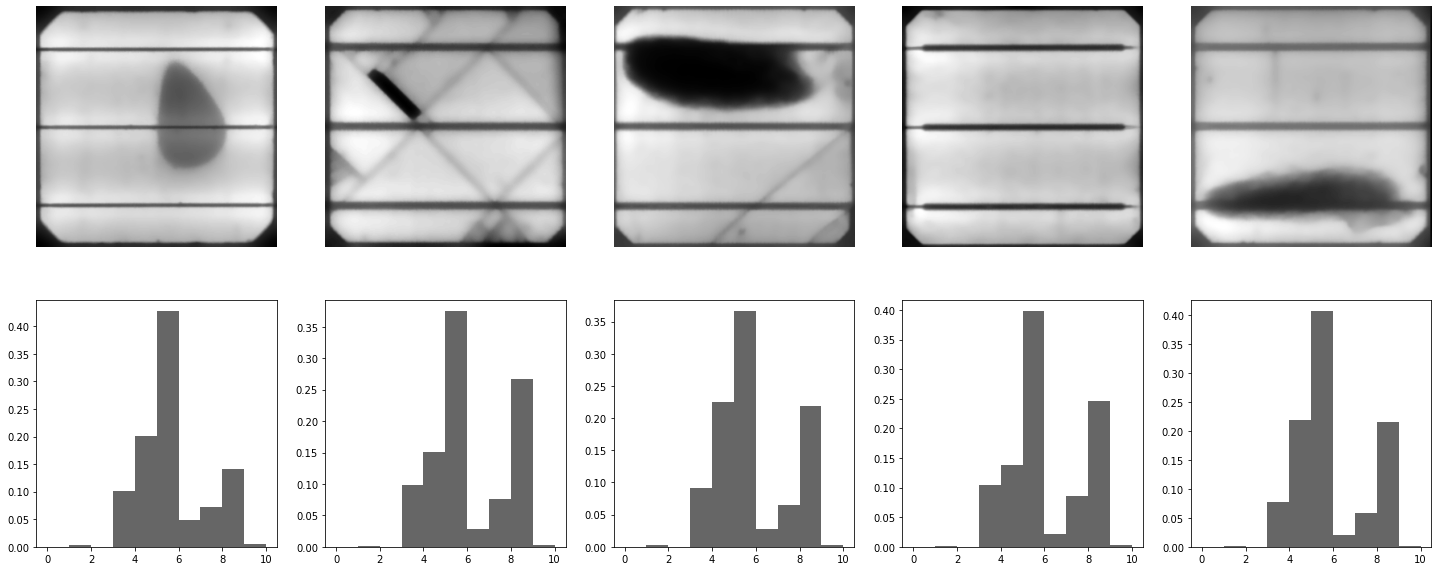

In [141]:
# settings for LBP
radius = 1
n_points = 8 * radius
METHOD = 'uniform'


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.4')

img1 = img1_filter
img2 = img2_filter
img3 = img3_filter
img4 = img4_filter
img5 = img5_filter


refs = {
    'img1': local_binary_pattern(img1, n_points, radius, METHOD),
    'img2': local_binary_pattern(img2, n_points, radius, METHOD),
    'img3': local_binary_pattern(img3, n_points, radius, METHOD),
    'img4': local_binary_pattern(img4, n_points, radius, METHOD),
    'img5': local_binary_pattern(img5, n_points, radius, METHOD),
}

# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5,
                                                       figsize=(25, 10))
plt.gray()

ax1.imshow(img1)
ax1.axis('off')
hist(ax6, refs['img1'])
ax4.set_ylabel('Percentage')

ax2.imshow(img2)
ax2.axis('off')
hist(ax7, refs['img2'])
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(img3)
ax3.axis('off')
hist(ax8, refs['img3'])

ax4.imshow(img4)
ax4.axis('off')
hist(ax9, refs['img4'])

ax5.imshow(img5)
ax5.axis('off')
hist(ax10, refs['img5'])

plt.show()

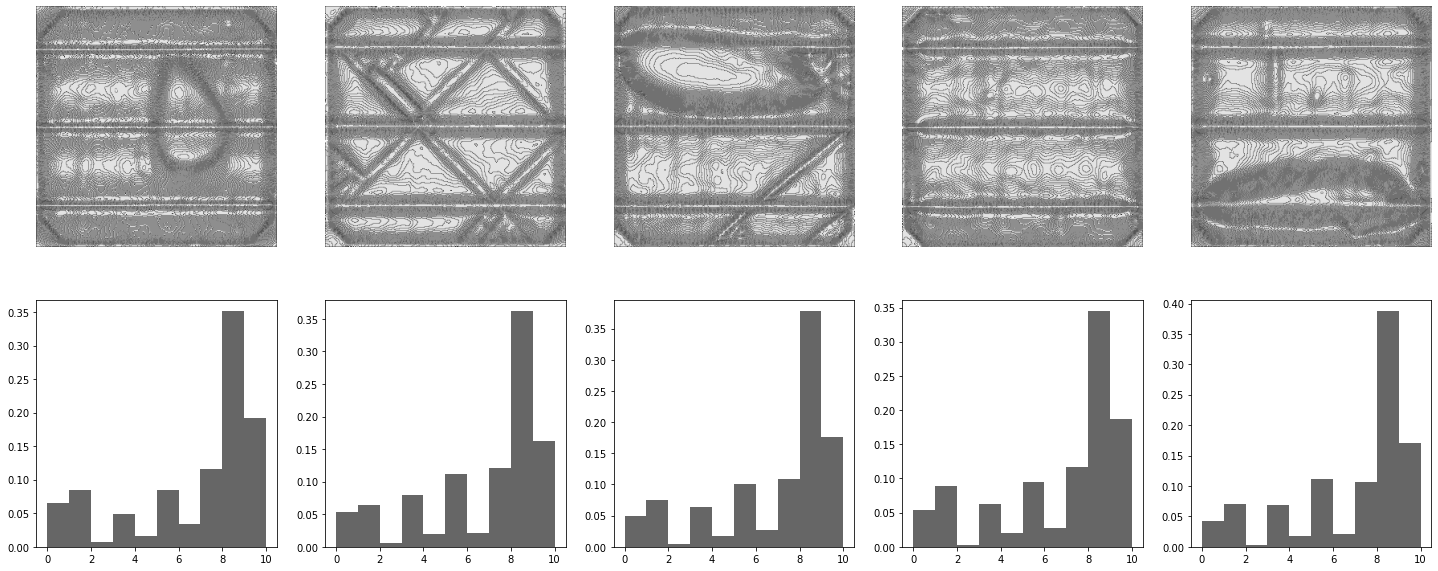

In [142]:
# settings for LBP
radius = 1
n_points = 8 * radius
METHOD = 'uniform'


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.4')

img1 = local_binary_pattern(img1_filter, n_points, radius, METHOD)
img2 = local_binary_pattern(img2_filter, n_points, radius, METHOD)
img3 = local_binary_pattern(img3_filter, n_points, radius, METHOD)
img4 = local_binary_pattern(img4_filter, n_points, radius, METHOD)
img5 = local_binary_pattern(img5_filter, n_points, radius, METHOD)


refs = {
    'img1': local_binary_pattern(img1, n_points, radius, METHOD),
    'img2': local_binary_pattern(img2, n_points, radius, METHOD),
    'img3': local_binary_pattern(img3, n_points, radius, METHOD),
    'img4': local_binary_pattern(img4, n_points, radius, METHOD),
    'img5': local_binary_pattern(img5, n_points, radius, METHOD),
}

# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5,
                                                       figsize=(25, 10))
plt.gray()

ax1.imshow(img1)
ax1.axis('off')
hist(ax6, refs['img1'])
ax4.set_ylabel('Percentage')

ax2.imshow(img2)
ax2.axis('off')
hist(ax7, refs['img2'])
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(img3)
ax3.axis('off')
hist(ax8, refs['img3'])

ax4.imshow(img4)
ax4.axis('off')
hist(ax9, refs['img4'])

ax5.imshow(img5)
ax5.axis('off')
hist(ax10, refs['img5'])

plt.show()